# Workflow Debugging

0.9150485436893204
Compilation paths from Train Data:  {0, 1, 2, 5, 6, 7, 8}
Compilation paths from Test Data:  {0, 1, 2, 4, 5, 6, 7, 8}
Compilation paths from Predictions:  {0, 1, 2, 5, 6, 7, 8}


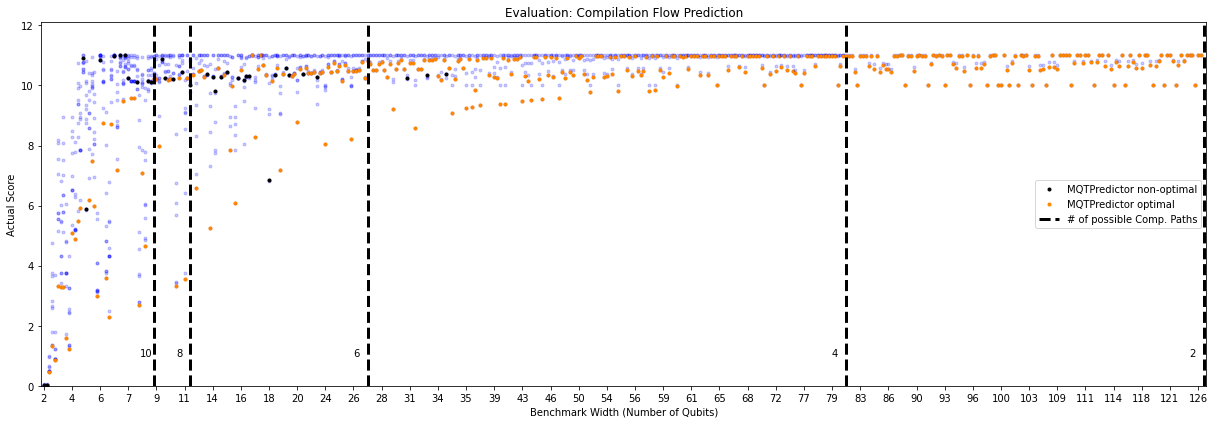

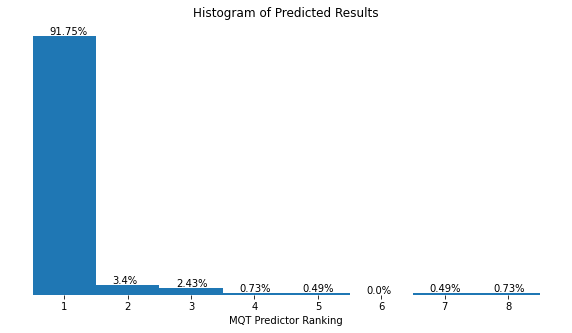

sum:  100.02000000000001


/Users/nils/miniforge3/envs/tf3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
from predictor.driver import Predictor
from predictor.src import utils

import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split


training_data, names_list, scores_list = Predictor.generate_trainingdata_from_json("json_new_scheme_server_1000.json")
X, y = zip(*training_data)
X = np.array(X)
y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# non_zero_indices = []
# for i in range(len(X[0])):
#    if sum(X[:,i]) > 0:
#        non_zero_indices.append(i)
# X = X[:, non_zero_indices]
# openqasm_gates_list = utils.get_openqasm_gates()
# res = [openqasm_gates_list[i] for i in range(0, len(openqasm_gates_list))]
# res.append("num_qubits")
# features = np.sort(np.array(res))
# features = features[non_zero_indices]
# print(features)


# scaler = preprocessing.StandardScaler().fit(X)
# X = preprocessing.normalize(X, norm='l2')
# X = scaler.transform(X)

Predictor.train_decision_tree_classifier(X,y, names_list, scores_list, max_depth=5);

# Parameter Gridsearch

In [5]:
import matplotlib.pyplot as plt
from predictor.src import utils
from sklearn.tree import plot_tree
from sklearn import tree

X, y, indices = np.array(X), np.array(y), np.array(range(len(y)))
(
    X_train,
    X_test,
    y_train,
    y_test,
    indices_train,
    indices_test,
) = train_test_split(X, y, indices, test_size=0.3, random_state=42)

clf_instance = tree.DecisionTreeClassifier()



In [6]:
from sklearn.model_selection import GridSearchCV
tree_param = [{'criterion': ['entropy', 'gini'], 
              'max_depth': [i for i in range(1,15,1)],
              'min_samples_split': [i for i in range(2,20,2)],
              'min_samples_leaf': [i for i in range(2,20,2)],
              'max_leaf_nodes': [i for i in range(2,200, 20)],
              'max_features': [i for i in range(1,45,5)]},
             ]
clf = GridSearchCV(clf_instance, tree_param, cv=5)
clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=31,
                       max_leaf_nodes=142, min_samples_leaf=2)
0.95


# Other Tree Plot Types

In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(23, 5))
clf = Predictor._clf


from dtreeviz.trees import dtreeviz # remember to load the package
machines = [
        "qiskit_ibm_washington",
        "qiskit_ibm_montreal",
        "qiskit_ionq",
        "qiskit_rigetti",
        "qiskit_oqc",
        "tket_ibm_washington",
        "tket_ibm_montreal",
        "tket_ionq",
        "tket_rigetti",
        "tket_oqc",
    ]
openqasm_gates_list = utils.get_openqasm_gates()
res = [openqasm_gates_list[i] for i in range(0, len(openqasm_gates_list))]
res.append("num_qubits")
features = np.sort(np.array(res))

X, y, indices = np.array(X), np.array(y), np.array(range(len(y)))
(
    X_train,
    X_test,
    y_train,
    y_test,
    indices_train,
    indices_test,
) = train_test_split(X, y, indices, test_size=0.3, random_state=42)

clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(X_train, y_train)
viz = dtreeviz(clf, 
               X_train, 
               y_train,
               target_name="target",
               feature_names=features,
               class_names=machines,
               fancy=True
)
viz.save_svg()
viz


In [ ]:
import graphviz
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
dot_data = tree.export_graphviz(clf, out_file=None, 
               feature_names=features,
               class_names=machines,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph.render("graphviz")

In [ ]:
a = [2,5]

In [ ]:
np.where(np.array(a) >= 8)[0][0]